# 데이터 탐색

## 탐색적 데이터 분석(EDA : Exploratory Data Analysis)
- 수집한 데이터가 들어왔을 때, 다양한 방법을 통해서 자료를 관찰하고 이해하는 과정을 의미
- 데이터의 분포 및 값을 검토함으로서, 데이터가 표현하는 현상을 이해한다.
- 데이터 분석 진행 전 해당 데이터의 탐색과 이해를 위해 전반적인 사전 탐색을 한다.

## 분석 과정 및 절차
- 분석 목적과 변수를 확인 : 개발 변수의 이름과 특성을 확인한다.<br><br>
- 데이터 문제성 확인 : 결측치와 이상치 유무 등을 확인한다. 분포상의 이상 형태 확인(head, tail)<br>
    &nbsp;-> 왜 발생했는지?, 어떻게 할지?<br>
    &nbsp;-> 결측치 대치 방법 : 단순대치법, 다중대치법<br>
    &nbsp;-> 이상치 대치 방법 : 제거, 대체, 유지 등<br><br><br>
- 데이터의 개별 속성값 분포 확인 : 기초 통계량을 데이터가 예상한 범위와 분포를 가지는지 확인한다.
    &nbsp;-> 데이터의 중심 : 평균, 중간값, 최빈값<br>
    &nbsp;-> 데이터의 분산 : 범위, 분산, 표준편차<br>
    &nbsp;-> 시각화를 통해 주어진 데이터의 개별 속성을 파악<br>
    &nbsp;&nbsp;-> 확률 밀도 함수, 히스토그램, 박스플롯, 산점도<br>
    &nbsp;&nbsp;-> 워드클라우드, 시계열 차트, 지도 등<br><br><br>
- 데이터 사이의 관계 확인 : 개별 속성에서 보이지 않는 상관관계 등을 확인
    &nbsp;-> 상관관계 분석을 통해 데이터 속성 간의 관계를 파악<br>
    &nbsp;-> 관계가 없으면 독립적인 관계, 관계가 존재하면 상관된 관계<br>

### 타이타닉 데이터셋
- 891개 행, 12열, 생존 여부(Survived)는 범주형 변수에 해당되며, 1(생존), 0(사망)의 값을 갖는 이진분류 문제

In [ ]:
!pip install matplotlib

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../csv/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 범주형 데이터 타입 확인

In [ ]:
# Survived, Pclass 는 숫자지만, 범주형 숫자므로 -> 문자열(object)로 변환
df["Survived"] = df["Survived"].astype(str)
df["Pclass"] = df["Pclass"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


##### 결측치 찾기

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Age, Cabin, Embarked 열에 결측치가 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
# 기초 통계량
# tatget : Survived -> 0 / 1
# Pclass : 3개 범주 중 3이 가장 많고, 그 수는 491
# sex : 남성 557 명 > 여성 314 명
# age : 0.42 ~ 80세, 177개의 결측치
# SibSp : 0 ~ 8
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### 기초 데이터 분석

In [ ]:
# Pclass 변수 분석
grouped = df.groupby("Pclass").size()
grouped

Pclass
1    216
2    184
3    491
dtype: int64

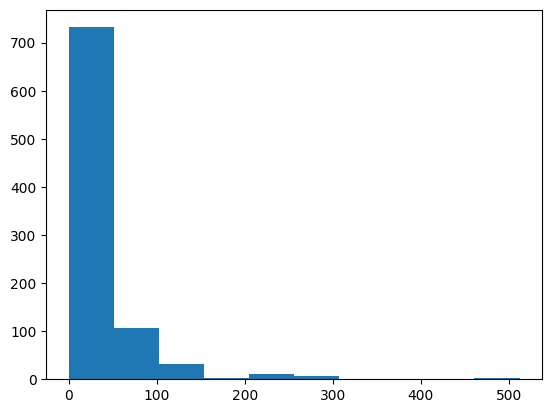

In [ ]:
# Fare 요금 변수 분석 -> numeric
plt.hist(df['Fare'])
plt.show()


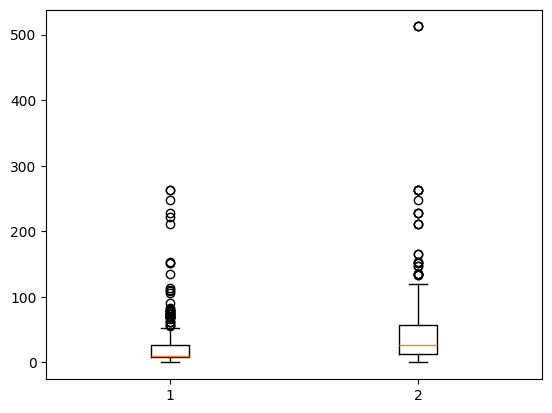

In [17]:
# 요금별 생존율의 차이가 있는지?
# 데이터 분리
data_0 = df[df["Survived"]=="0"]["Fare"]    # 사망자의 요금 데이터
data_1 = df[df["Survived"]=="1"]["Fare"]    # 생존자의 요금 데이터

# Boxplot
# fig : figure 객체, 전체 그램
# ax : Axes 객체, 개별 플롯(서브 플롯, 그래프)
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

# -> 생존자들이 사망자보다 요금이 높지만, 그렇게 큰 차이는 없다.
# -> 이상치 존재

In [ ]:
# sex 변수 분석
# 남, 여 간에 생존율의 차이가 있는지를 파악하기 위해, 성별에 다른 데이터의 분석 및 시각화
grouped = df.groupby('Sex')
print(grouped.size())   # 전체적인 빈도수
print()

# 성별 생존자 수
data_0 = df[df["Sex"]=="female"]["Survived"]            # 여성의 생존 데이터
data_0 = pd.DataFrame(data_0).groupby("Survived")
print(data_0.size())
print()

data_1 = df[df["Sex"]=="male"]["Survived"]
data_1 = pd.DataFrame(data_1).groupby("Survived")
print(data_1.size())

# 사망자는 남성이 여성보다 훨씬 많은 반면, 생존률은 여성이 높다.

Sex
female    314
male      577
dtype: int64

Survived
0     81
1    233
dtype: int64

Survived
0    468
1    109
dtype: int64


### 데이터 전처리 유형
1) 데이터 전처리 필요성
- one-hot-encoding : 문자로 된 범주형 데이터의 경우 -> 처리를 편하게 하기 위해 숫자로 표현을 바꾼다.
- normalize : 수치 데이터의 분포를 정규화한다.
- 데이터 전처리 형태 : 필터링, 데이터 형식 변환, 여러 소스에서 가져온 데이터 통합<br>

2) 결측치 처리
- 모두 버리기, 적절한 값으로(평균 등) 대체, 다음 단계로 넘기기.
- ex) 월급의 경우, 정규 분포가 아닌 Skewed distribution(오른쪽으로 꼬리가 긴) 분포 -> 하위 구간에 많이 몰림
- -> 하위 25% 값을 결측치 대체값으로 사용<br>

3) 틀린(invalid) 값 처리
- 틀린 값은 바로 발견할 수 없고, 프로그램에 의해 일일이 어떤 기준이나 규칙에 따라 찾아내야 한다.
- 틀린 값을 처리하는 방법도 결측치를 처리하는 방법과 같다. ( 버리거나, 대체하거나, 다음 단계)<br>

4) 이상치(outlier) 처리
- 값의 범위가 일반적인 범위를 벗어나 특별한 값을 갖는 것
- 이상치 검출(detection)<br>

5) 데이터 변환
- 데이터를 분석하기 좋은 형태로 바꾸는 작업
- 데이터의 분포를 고려해 정규화하거나, 단위를 조정하거나, 로그 스케일로 변환하는 것 <br><br>
(1) 수치 데이터 -> 범주형으로 변환 <br>
&nbsp;&nbsp;ex) 출생년도 -> 10대, 20대, 30대 <br><br>
(2) 일반 정규화 -> 원래 주어진 수치 값을 바로 사용하는게 타당하지 않을 때 <br>
&nbsp;&nbsp; -> 수치로 된 값들을 여러 개 사용할 때, 각 수치의 범위가 다르면 같은 범위로 변환해서 사용하는 것  <br>
&nbsp;&nbsp;ex) 두 과목의 시험을 가지고 평가하는데 만점이 다른 경우<br><br>
(3) z-score 정규화 -> 표준 편차를 고려한 데이터 변환 <br>
&nbsp;&nbsp; -> 평균을 0점, 표준 편차를 1점으로 환산<br><br>
(4) 로그(log) 변환 -> 로그를 취한 값을 사용하는 것 -> 정규 분포에 가깝게 변환되는 경우가 있음 <br>
&nbsp;&nbsp;ex) 값의 범위가 너무 큰 경우, 숫자의 증가를 덧셈이 아닌 곱셈으로 처리하는 것이 직관적으로 더 편리한 경우 등<br><br>
(5) 역수 변환 -> 역수를 사용하면 오히려 선형적인 특성을 가지게 되어 의미를 해석하기 쉬워지는 경우 <br><br>

6. 데이터 축소(reduction)
- 데이터 축소란 같은 정보량을 가지면서 데이터의 크기를 줄이는 것
- 기존 데이터들의 특징들을 대표하는 새로운 값을 추출하는 것 PCA(Principal componet analysis)라 한다. 또는 새로운 값을 만든다.<br>
&nbsp;&nbsp;ex) 몸무게와 허리둘레가 항상 같은 패턴으로 변한다면, 둘 중 허리둘레 하나만 사용해도 된다.<br>

7. 샘플링(sampling)
- 구할 수 있는 전체 데이터 중에서 분석에 필요한 데이터를 취하는 것. 분석의 타당성을 조사하거나, 분석 모델(알고리즘)의 큰 방향을 정할 때 사용
- 데이터 샘플링에서 중요한 것은 샘플링된 데이터가 전체 데이터의 특징을 계속 유지할 수 있도록 하는 것. 골고루 균일하게 샘플링<br>

8. 훈련 데이터와 테스트 데이터
- 훈련용, 테스트용 데이터를 준비할 때 랜덤한 성질을 보장하는 것이 중요

In [ ]:
# 중간 값으로 대체
df['월급'].fillna(df['월급'].median(), inplace=True)

# 하위 25% 값으로 대체
q1 = df['월급'].quantile(0.25)
df['월급'].fillna(q1, inplace=True)

### 데이터 변환

1. 표준정규화
- 데이터의 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정을 데이터 스케일링(scaling)
- 변수들의 측정단위나 값 범위가 다를 때 적용


In [27]:
# 정규 분포
# 한국인 1,000명의 연간 육류소비량이 53.9kg, 표준편차 5kg
# 일본인 1,0000명의 연간 육류소비량이 32.7kg, 표준편차 4kg

import numpy as np
import pandas as pd

# 한국인, 일본인 각 성인 1000명의 육류소비량 데이터 생성
meat_consumption_korean = 5 * np.random.randn(1000) + 53.9
meat_consumption_japan = 4 * np.random.randn(1000) + 32.7

# 데이터프레임 생성
meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean, "일본인":meat_consumption_japan})

# 상위 6개 데이터 확인
meat_consumption.head()

,한국인,일본인
0,51.019145,30.764425
1,58.113959,22.198719
2,49.429058,30.039411
3,52.253608,32.552331
4,62.185396,26.184580


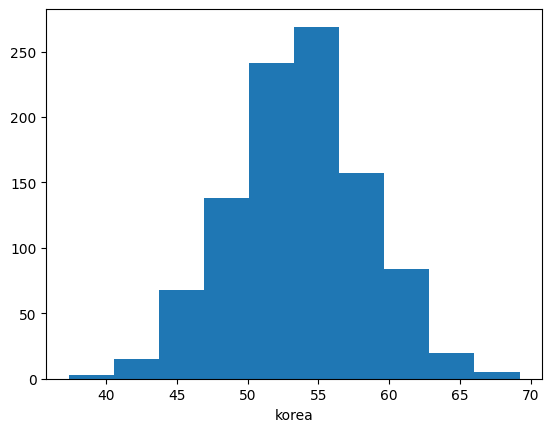

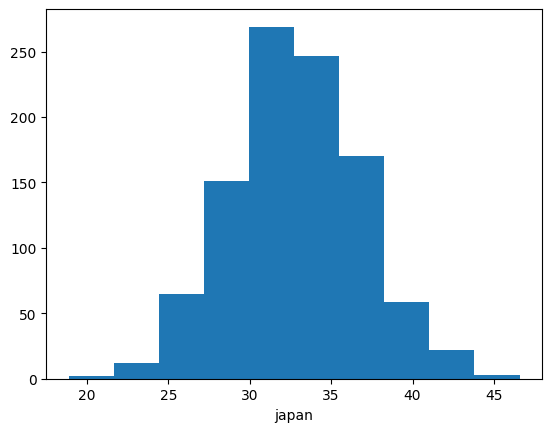

In [29]:
# 시각화
import matplotlib.pyplot as plt

# 한국인 육류소비량 히스토그램
plt.hist(meat_consumption_korean)
plt.xlabel('korea')
plt.show()

# 일본인 육류소비량 히스토그램
plt.hist(meat_consumption_japan)
plt.xlabel('japan')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["한국인_정규화"] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption["일본인_정규화"] = scaler.fit_transform(meat_consumption[['일본인']])

##### 결측치 처리


In [30]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
# 1. 제거
df_1 = df.dropna(axis=0)
print(df_1.isnull().sum().sum())
df_1.shape
df

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,None,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,None,0,0,111369,30.0000,C148,C


In [39]:
# 평균값으로 채우기
age_mean = df['Age'].mean()
df.fillna(age_mean, inplace=True)
print(df['Age'].isnull().sum())
df

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [40]:
# 최빈값으로 채우기
from scipy.stats import mode

embarked_mode = df["Embarked"].mode()
df["Embarked"].fillna(embarked_mode, inplace=True)
print(df['Embarked'].isnull().sum())

0


In [ ]:
# 직전행 값으로 채우기
df["Embarked"].fillna(method ='ffill', inplace=True)

##### 이상치 처리(Outlier)
- 사분위범위, 정규분포를 이용해서 식별하고, 식별된 이상값은 제거 여부를 판단
- 이상치는 describe() 함수를 통해 얻은 사분위범위를 이용해서 IQR(Q3(.75)-Q1(0.25))을 구한다.
- (이상치 > Q3 + IQR * 1.5) or (이상치 < Q1-IQR * 1.5)

In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
